In [22]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from dataset_loading import CocoLoader
import torch
import numpy as np
from matplotlib import colormaps

import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:

#CUDA tests
os.environ["CUDA_VISIBLE_DEVICES"] = "1" #might not be viable, check again!

print("CUDA available:" + str(torch.cuda.is_available()))
torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#wont work for some reason
available_gpus = [torch.cuda.device(i) for i in range(torch.cuda.device_count())]
print(available_gpus)
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.device_count())

#this will work
test_tensor = torch.tensor(np.ones(100000000)).cuda()
del(test_tensor)
torch.cuda.empty_cache()

CUDA available:True
[]
0
0
0


In [9]:
coco=CocoLoader() #TODO: can add config here?
transforms = None
data_train, api = coco.load_train(transformations=transforms)
#data_val, api = coco.load_val(transformations=transforms) 


loading annotations into memory...
Done (t=13.26s)
creating index...
index created!
loading annotations into memory...
Done (t=8.47s)
creating index...
index created!


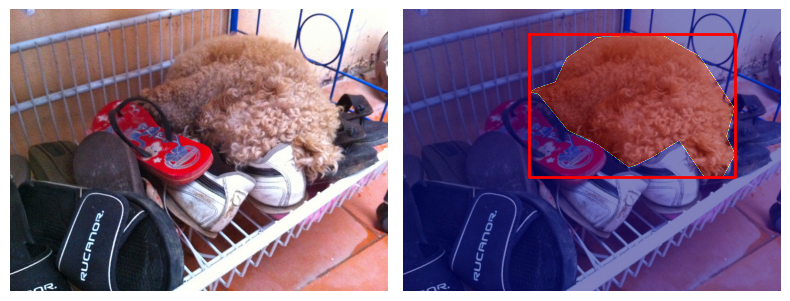

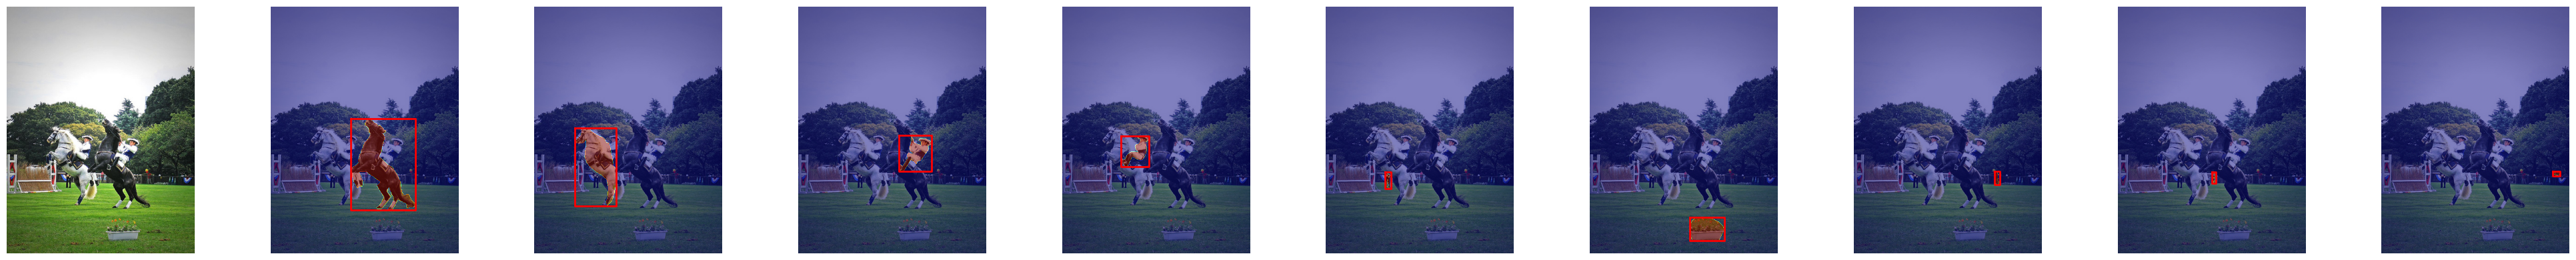

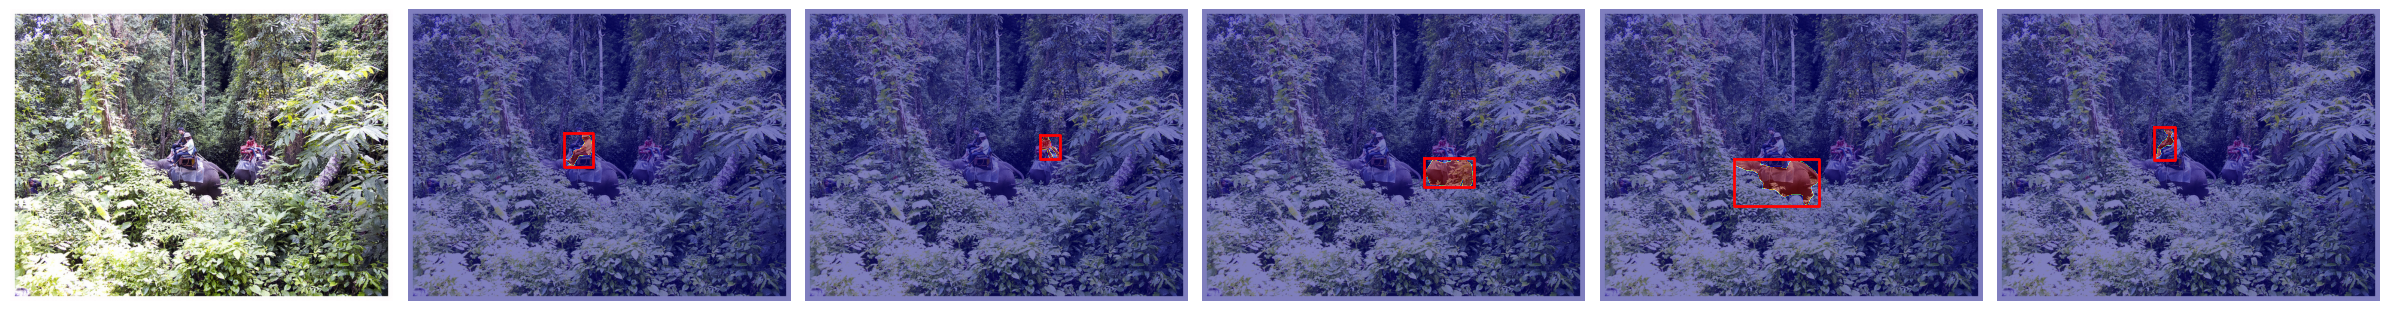

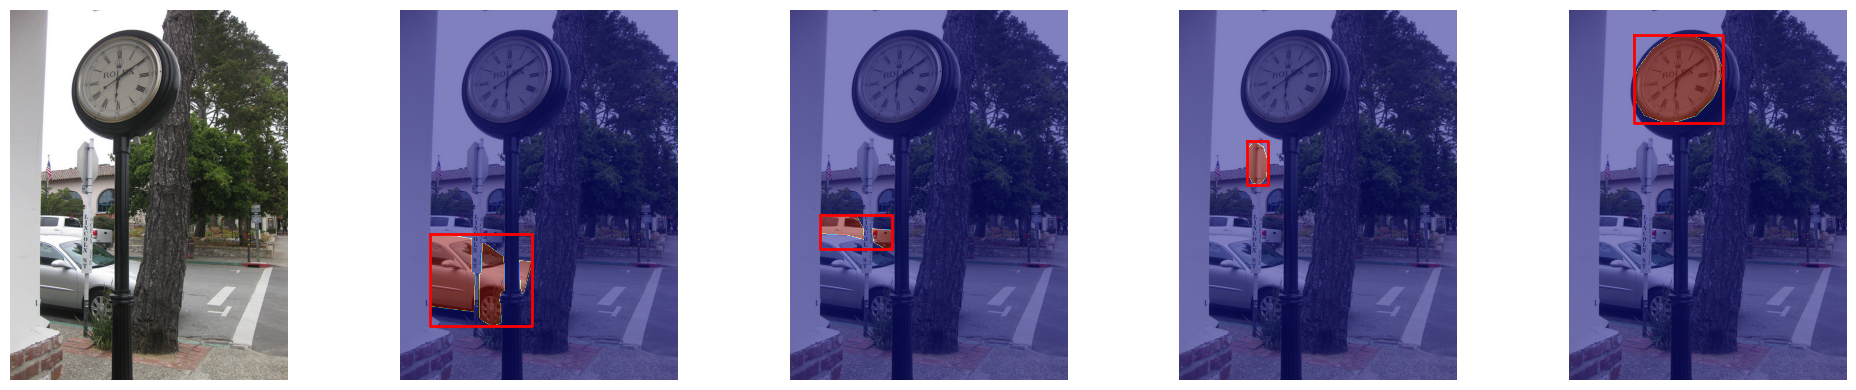

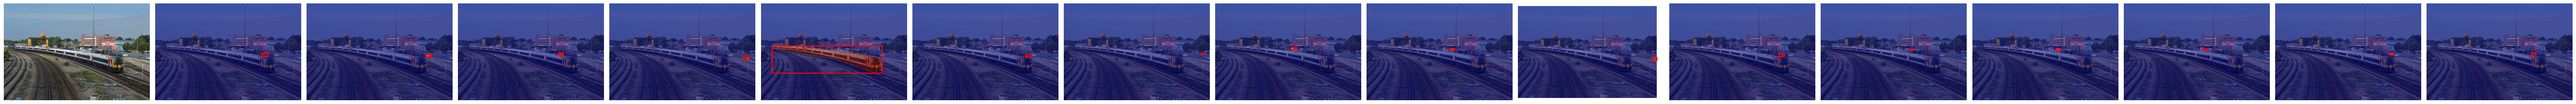

In [12]:
images_to_show =5
offset=5
scale=4

for i in range(images_to_show):
    item = data_train[offset+i]
    img = item[0]
    metadata = item[1]

    num_imgs = len(metadata)+1
    fig, axes = plt.subplots(1, num_imgs, figsize=(num_imgs * scale,  scale))
    axes=axes.flatten()

    for i,ax in enumerate(axes):
        if i==0: #straight up image
            ax.imshow(img)
            ax.axis('off')

        else: #masks
            rle = metadata[i-1]
            mask = api.annToMask(rle)
            ax.axis('off')
            ax.imshow(img)
            ax.imshow(mask, cmap='jet', alpha=0.5)

            box = rle['bbox']
            ax.plot([box[0], box[0] + box[2], box[0] + box[2], box[0], box[0]],
                    [box[1], box[1], box[1] + box[3], box[1] + box[3], box[1]],
                    color='red', linewidth=2)
    plt.tight_layout()
    plt.show()



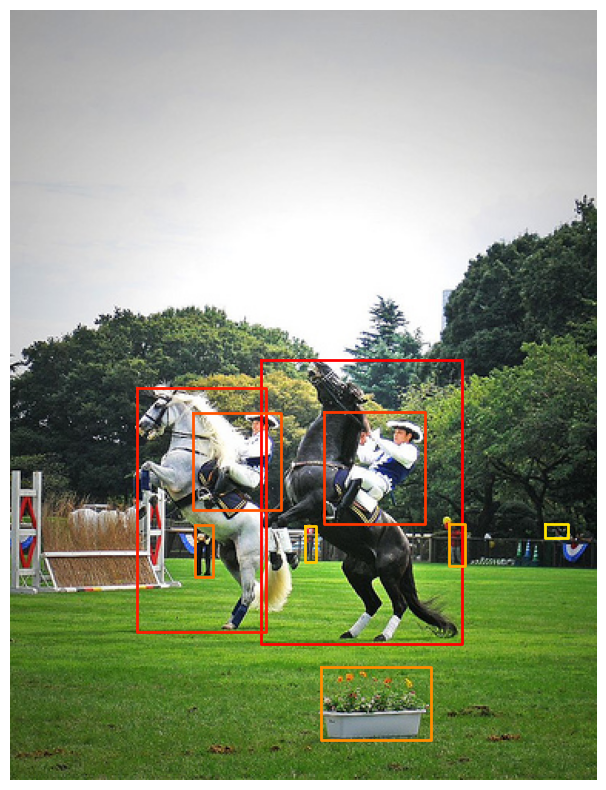

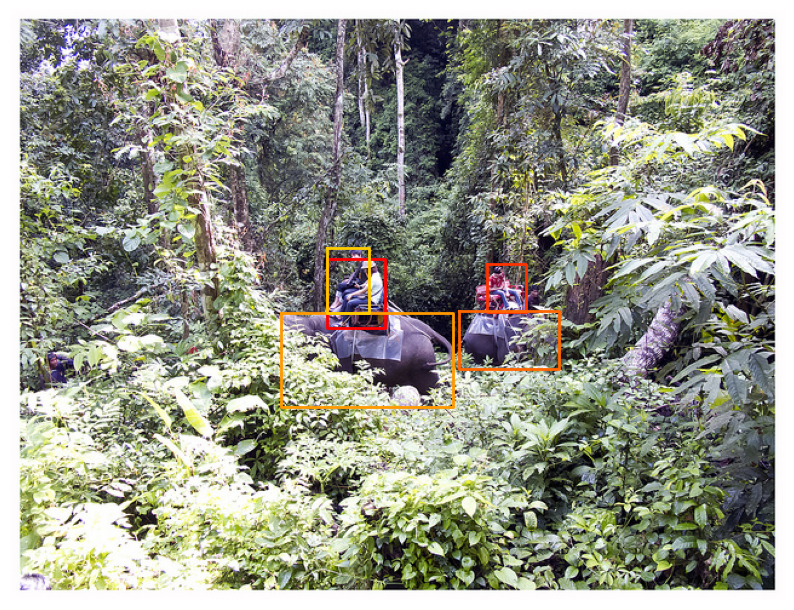

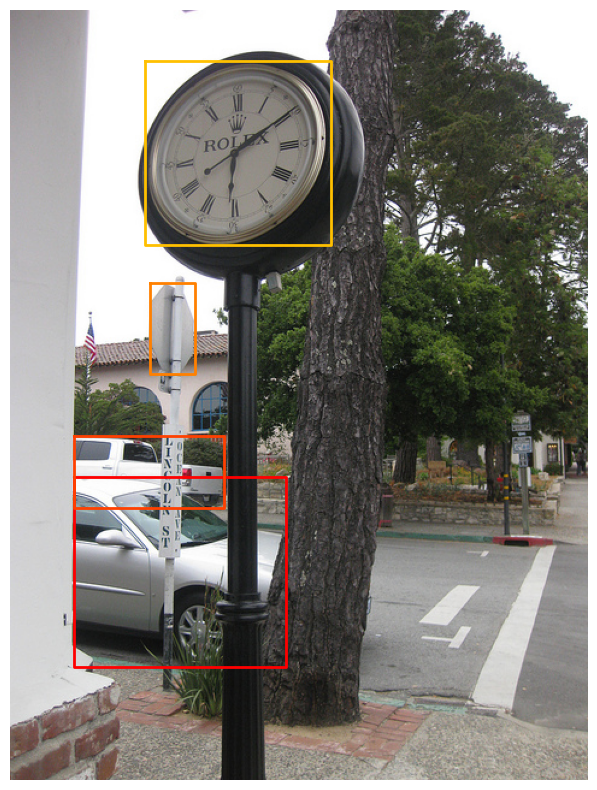

In [43]:
images_to_show =3
offset=6
scale=8

for i in range(images_to_show):
    item = data_train[offset+i]
    img = item[0]
    metadata = item[1]

    plt.figure(figsize=(scale, scale))
    plt.imshow(img) #first image
    plt.axis('off')

    cmap =colormaps['autumn']
    num_images = len(metadata)

    for i,rle in enumerate(metadata): #all masks
        mask = api.annToMask(rle)
        plt.imshow(mask, cmap='jet', alpha=0.0) #TODO:  show just the masked part with color and not the rest?

        box = rle['bbox']
        
        plt.plot([box[0], box[0] + box[2], box[0] + box[2], box[0], box[0]],
                [box[1], box[1], box[1] + box[3], box[1] + box[3], box[1]],
                color=cmap(i/num_images), linewidth=2)

    plt.show()


In [23]:

GTboxes=[]
for item in data_train: 
    img = item[0]
    metadata = item[1]
    bboxes_per_img = [] #unknown number of objects
    for mask in metadata:
        box = mask['bbox']
        bboxes_per_img.append(box)
        # TODO: additional logic for masks later 
    GTboxes.append(bboxes_per_img)
        
    #use model to predict BBox
    #compare with GT in GTBBox (torchmetrics!)
    #   iou defined in pycocotools too

    break
